In [1]:
# train_test_split -- takes an X (inputs/examples) and y (outputs/answers)
#  returns X_train, X_test, y_train, y_test
#  train with X_train and y_train
#  test with X_test and y_test
#   we can check -- are the results (y_pred) the same as y_test?
#   if not the same, how close?

# cross_val_score -- function that does the same sort of testing
#  as train_test_split, but we don't have to do as much.  We can
#  swap out the algorithm for a different testing strategy

# the default strategy is StratifiedKFold, which means: create n
#  groups, each group *MUST* have at least one rep from each class
#  (category)

# another strategy is LeaveOneOut -- train with all but one
#  of the data points, and test with one data point.  With n
#  data points, we'll do n iterations, each giving 0/1 for 
#  successful prediction

In [3]:
%pylab inline
import pandas as pd
from pandas import Series, DataFrame

from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

iris = load_iris()
X = DataFrame(iris.data, columns=iris.feature_names)
y = Series(iris.target)

model = KNeighborsClassifier()  # default: k=5

results = cross_val_score(model, X, y, cv=5)  # divide into 5 parts
Series(results).describe()

Populating the interactive namespace from numpy and matplotlib


count    5.000000
mean     0.973333
std      0.027889
min      0.933333
25%      0.966667
50%      0.966667
75%      1.000000
max      1.000000
dtype: float64

In [4]:
%pylab inline
import pandas as pd
from pandas import Series, DataFrame

from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, LeaveOneOut

strategy = StratifiedKFold()

iris = load_iris()
X = DataFrame(iris.data, columns=iris.feature_names)
y = Series(iris.target)

model = KNeighborsClassifier()  # default: k=5

results = cross_val_score(model, X, y, cv=strategy)  # divide into 5 parts
Series(results).describe()

Populating the interactive namespace from numpy and matplotlib


count    5.000000
mean     0.973333
std      0.027889
min      0.933333
25%      0.966667
50%      0.966667
75%      1.000000
max      1.000000
dtype: float64

In [7]:
%pylab inline
import pandas as pd
from pandas import Series, DataFrame

from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, LeaveOneOut

strategy = KFold(n_splits=3, shuffle=True)

iris = load_iris()
X = DataFrame(iris.data, columns=iris.feature_names)
y = Series(iris.target)

model = KNeighborsClassifier()  

results = cross_val_score(model, X, y, cv=strategy)  # divide into 5 parts
Series(results).describe()

Populating the interactive namespace from numpy and matplotlib


count    3.000000
mean     0.966667
std      0.011547
min      0.960000
25%      0.960000
50%      0.960000
75%      0.970000
max      0.980000
dtype: float64

In [8]:
%pylab inline
import pandas as pd
from pandas import Series, DataFrame

from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, LeaveOneOut

strategy = LeaveOneOut()

iris = load_iris()
X = DataFrame(iris.data, columns=iris.feature_names)
y = Series(iris.target)

# model = KNeighborsClassifier(n_neighbors=11)
model = KNeighborsClassifier()  

results = cross_val_score(model, X, y, cv=strategy)  # divide into 5 parts
Series(results).describe()

# Use a "for" loop to iterate over all k values from 1 to 23
# Use cross_val_score and LeaveOneOut to identify the best
# value of k (highest mean, lowest std, lowest k)

Populating the interactive namespace from numpy and matplotlib


count    150.000000
mean       0.966667
std        0.180107
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
dtype: float64

In [10]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, LeaveOneOut

strategy = LeaveOneOut()

iris = load_iris()
X = DataFrame(iris.data, columns=iris.feature_names)
y = Series(iris.target)

all_results = []
for k in range(1, 24, 2):
    print(k, end=' ')
    model = KNeighborsClassifier(n_neighbors=k)

    results = cross_val_score(model, X, y, cv=strategy)  # divide into 5 parts
    all_results.append({'k':k, 
                        'mean':results.mean(), 
                        'std':results.std()})

# Use a "for" loop to iterate over all k values from 1 to 23
# Use cross_val_score and LeaveOneOut to identify the best
# value of k (highest mean, lowest std, lowest k)

1 3 5 7 9 11 13 15 17 19 21 23 

In [13]:
df = DataFrame(all_results).set_index('k')
df

,mean,std
k,,
1,0.960000,0.195959
3,0.960000,0.195959
5,0.966667,0.179505
7,0.966667,0.179505
9,0.966667,0.179505
11,0.973333,0.161107
13,0.966667,0.179505
15,0.973333,0.161107
17,0.973333,0.161107


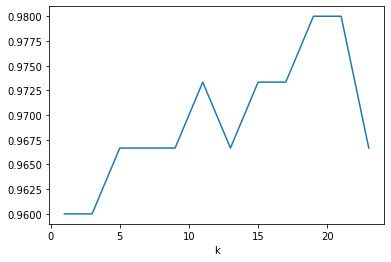

In [14]:
df['mean'].plot.line()

In [17]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate, cross_val_score, KFold, StratifiedKFold, LeaveOneOut

strategy = StratifiedKFold()

iris = load_iris()
X = DataFrame(iris.data, columns=iris.feature_names)
y = Series(iris.target)

model = KNeighborsClassifier()  

results = cross_validate(model, X, y, cv=strategy)  # divide into 5 parts


In [18]:
results

{'fit_time': array([0.01580596, 0.01308513, 0.01501799, 0.05276299, 0.00981498]),
 'score_time': array([0.01788592, 0.02835894, 0.05560994, 0.02706718, 0.01465082]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])}

In [19]:
DataFrame(results)

,fit_time,score_time,test_score
0,0.015806,0.017886,0.966667
1,0.013085,0.028359,1.000000
2,0.015018,0.055610,0.933333
3,0.052763,0.027067,0.966667
4,0.009815,0.014651,1.000000


In [21]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate, cross_val_score, KFold, StratifiedKFold, LeaveOneOut

strategy = StratifiedKFold()

iris = load_iris()
X = DataFrame(iris.data, columns=iris.feature_names)
y = Series(iris.target)

model = KNeighborsClassifier()  

results = cross_validate(model, X, y, cv=strategy, 
                         return_train_score=True)  # divide into 5 parts
DataFrame(results)

,fit_time,score_time,test_score,train_score
0,0.008005,0.018493,0.966667,0.966667
1,0.007895,0.011457,1.000000,0.966667
2,0.010417,0.012367,0.933333,0.975000
3,0.008073,0.012160,0.966667,0.975000
4,0.006127,0.009114,1.000000,0.966667


In [ ]:
# parametric model -- short and simple, usually using a 
#  mathematical equation to decide what's in each class.

# works well with regular, easily described data.

# LogisticRegression



# non-parametric model -- can be complex and use extra memory
#  or time.  

# works well with all sorts of data, including when it's not
# regularly distributed

# KNeighborsClassifier is non-parametric

In [23]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, cross_val_score, KFold, StratifiedKFold, LeaveOneOut

strategy = StratifiedKFold()

iris = load_iris()
X = DataFrame(iris.data, columns=iris.feature_names)
y = Series(iris.target)

model = LogisticRegression(solver='liblinear')  

results = cross_validate(model, X, y, cv=strategy, 
                         return_train_score=True) 
DataFrame(results)

,fit_time,score_time,test_score,train_score
0,0.024637,0.004684,1.000000,0.950000
1,0.023267,0.018279,0.966667,0.966667
2,0.015062,0.004546,0.933333,0.966667
3,0.015072,0.003305,0.900000,0.975000
4,0.009636,0.002806,1.000000,0.958333


In [24]:
DataFrame(results).mean()

fit_time       0.017535
score_time     0.006724
test_score     0.960000
train_score    0.963333
dtype: float64

In [25]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, cross_val_score, KFold, StratifiedKFold, LeaveOneOut

strategy = StratifiedKFold()

iris = load_iris()
X = DataFrame(iris.data, columns=iris.feature_names)
y = Series(iris.target)

model = KNeighborsClassifier(n_neighbors=17)

results = cross_validate(model, X, y, cv=strategy, 
                         return_train_score=True) 
DataFrame(results).mean()

fit_time       0.014668
score_time     0.017899
test_score     0.966667
train_score    0.975000
dtype: float64

In [ ]:
# Use Logistic Regression to make iris predictions
# How does it do?


In [28]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, cross_val_score, KFold, StratifiedKFold, LeaveOneOut

strategy = StratifiedKFold()

iris = load_iris()
X = DataFrame(iris.data, columns=iris.feature_names)
y = Series(iris.target)

knn = KNeighborsClassifier()
lr = LogisticRegression(solver='liblinear')  

for model in [knn, lr]:
    results = cross_val_score(model, X, y, cv=strategy)
    print(f'{model.__class__.__name__:20}: mean {results.mean()}, std {results.std()}')

KNeighborsClassifier: mean 0.9733333333333334, std 0.02494438257849294
LogisticRegression  : mean 0.9600000000000002, std 0.038873012632301994


In [30]:
# CART -- classification and regression trees
#   aka "decision trees"

# when we train (fit) a decision-tree model, 
# the model looks at all variables and values

# it finds the best split between Y/N (or </>) for the
# current data

# non-parametrics

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [31]:
# SVM -- simple vector machines
# very popular nowadays, especially with relative few data points

from sklearn.svm import SVC   # SVM classifier
model = SVC()

In [32]:
# (1) Copy the test harness that I created above with
# logistic regression and KNeighborsClassifier.  Add
# DecisionTree Classifier and SVC to those.

# (If you encounter problems/warnings/errors, let me know -- 
# I'll help you to fix them.)

# Question: Which of these models has the highest mean 
# prediction accuracy, with the lowest standard deviation?

In [37]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate, cross_val_score, KFold, StratifiedKFold, LeaveOneOut

strategy = StratifiedKFold()

iris = load_iris()
X = DataFrame(iris.data, columns=iris.feature_names)
y = Series(iris.target)

knn = KNeighborsClassifier()
lr = LogisticRegression(solver='liblinear')  
dtc = DecisionTreeClassifier()
svc = SVC()

for model in [knn, lr, dtc, svc]:
    results = cross_val_score(model, X, y, cv=strategy)
    print(f'{model.__class__.__name__:23}: mean {results.mean():5.4}, std {results.std():5.2}')

KNeighborsClassifier   : mean 0.9733, std 0.025
LogisticRegression     : mean  0.96, std 0.039
DecisionTreeClassifier : mean 0.9667, std 0.037
SVC                    : mean 0.9667, std 0.021


In [39]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate, cross_val_score, KFold, StratifiedKFold, LeaveOneOut

strategy = StratifiedKFold()

iris = load_iris()
X = DataFrame(iris.data, columns=iris.feature_names)
y = Series(iris.target)

knns = []
for k in range(1, 24, 2):
    knns.append(KNeighborsClassifier(n_neighbors=k))
lr = LogisticRegression(solver='liblinear')  
dtc = DecisionTreeClassifier()
svc = SVC()

all_results = []
for model in [*knns, lr, dtc, svc]:
    results = cross_val_score(model, X, y, cv=strategy)
    all_results.append({'model': model.__class__.__name__,
                        'mean': results.mean(),
                        'std': results.std()})

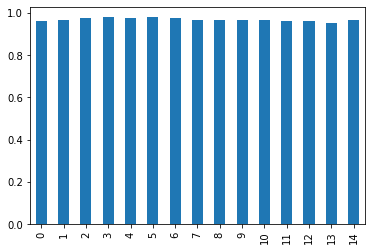

In [42]:
DataFrame(all_results)['mean'].plot.bar()

In [54]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate, cross_val_score, KFold, StratifiedKFold, LeaveOneOut

strategy = StratifiedKFold()

iris = load_iris()
X = DataFrame(iris.data, columns=iris.feature_names)
y = Series(iris.target)

knn = KNeighborsClassifier(n_neighbors=7)
lr = LogisticRegression(solver='liblinear')  
dtc = DecisionTreeClassifier()
svc = SVC()

for model in [knn, lr, dtc, svc]:
    results = cross_val_score(model, X, y, cv=strategy)
    print(f'{model.__class__.__name__:23}: mean {results.mean():5.4}, std {results.std():5.2}')

KNeighborsClassifier   : mean  0.98, std 0.016
LogisticRegression     : mean  0.96, std 0.039
DecisionTreeClassifier : mean  0.96, std 0.033
SVC                    : mean 0.9667, std 0.021


In [48]:
gs.fit(X, y)


GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': range(1, 24, 2)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [52]:
df = DataFrame(gs.cv_results_)
df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004544,0.000768,0.005111,0.001272,1,{'n_neighbors': 1},0.966667,0.966667,0.933333,0.933333,1.0,0.960000,0.024944,11
1,0.002896,0.000132,0.004367,0.000454,3,{'n_neighbors': 3},0.966667,0.966667,0.933333,0.966667,1.0,0.966667,0.021082,6
2,0.003333,0.000535,0.004877,0.000536,5,{'n_neighbors': 5},0.966667,1.000000,0.933333,0.966667,1.0,0.973333,0.024944,3
3,0.002918,0.000329,0.004354,0.000309,7,{'n_neighbors': 7},0.966667,1.000000,0.966667,0.966667,1.0,0.980000,0.016330,1
4,0.002989,0.000422,0.004189,0.000258,9,{'n_neighbors': 9},0.966667,1.000000,0.966667,0.933333,1.0,0.973333,0.024944,3


In [53]:
df.sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,0.002918,0.000329,0.004354,0.000309,7,{'n_neighbors': 7},0.966667,1.000000,0.966667,0.966667,1.0,0.980000,0.016330,1
5,0.002778,0.000250,0.004379,0.000340,11,{'n_neighbors': 11},0.933333,1.000000,1.000000,0.966667,1.0,0.980000,0.026667,1
2,0.003333,0.000535,0.004877,0.000536,5,{'n_neighbors': 5},0.966667,1.000000,0.933333,0.966667,1.0,0.973333,0.024944,3
4,0.002989,0.000422,0.004189,0.000258,9,{'n_neighbors': 9},0.966667,1.000000,0.966667,0.933333,1.0,0.973333,0.024944,3
6,0.002756,0.000205,0.004085,0.000151,13,{'n_neighbors': 13},0.933333,1.000000,0.966667,0.966667,1.0,0.973333,0.024944,3
1,0.002896,0.000132,0.004367,0.000454,3,{'n_neighbors': 3},0.966667,0.966667,0.933333,0.966667,1.0,0.966667,0.021082,6
7,0.002871,0.000268,0.004213,0.000391,15,{'n_neighbors': 15},0.933333,1.000000,0.933333,0.966667,1.0,0.966667,0.029814,6
8,0.002879,0.000271,0.004502,0.000381,17,{'n_neighbors': 17},0.933333,1.000000,0.933333,0.966667,1.0,0.966667,0.029814,6
9,0.002940,0.000199,0.004202,0.000149,19,{'n_neighbors': 19},0.933333,1.000000,0.933333,0.966667,1.0,0.966667,0.029814,6
10,0.003065,0.000313,0.004773,0.000396,21,{'n_neighbors': 21},0.933333,1.000000,0.933333,0.966667,1.0,0.966667,0.029814,6


In [55]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate, cross_val_score, KFold, StratifiedKFold, LeaveOneOut

strategy = LeaveOneOut()

iris = load_iris()
X = DataFrame(iris.data, columns=iris.feature_names)
y = Series(iris.target)

knn = KNeighborsClassifier(n_neighbors=7)
lr = LogisticRegression(solver='liblinear')  
dtc = DecisionTreeClassifier()
svc = SVC()

for model in [knn, lr, dtc, svc]:
    results = cross_val_score(model, X, y, cv=strategy)
    print(f'{model.__class__.__name__:23}: mean {results.mean():5.4}, std {results.std():5.2}')

KNeighborsClassifier   : mean 0.9667, std  0.18
LogisticRegression     : mean 0.9533, std  0.21
DecisionTreeClassifier : mean 0.9467, std  0.22
SVC                    : mean 0.9667, std  0.18


In [ ]:
# http://archive.ics.uci.edu/ml/datasets/Wine
    
    # Goal: Predict grape type ('cultivar') from 13 variables used
#  to measure wine.

# The output/target/grape type is 1-2-3, in the first column of
#  the data file (wine.data)

# The other 13 columns in the file describe different variables
#  that were measured.  (Look at the data dictionary/site to)
#  see what those are.

# You are to create a number of supervised classification models
# to predict the grape type.  Use cross-validation and use a 
# test harness to compare the different types.

# What model seems to predict the grapes best?

# WARNING: Some models will be REALLY REALLY BAD at predicting.
# Don't worry, that's normal!

In [60]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',
                header=None,
                names=['target', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline'])
df.head()

,target,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [61]:
X = df.drop('target', axis='columns')
y = df['target']

In [62]:
from sklearn.model_selection import cross_val_score, LeaveOneOut
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
svc = SVC()
lr = LogisticRegression(solver='liblinear')

strategy = LeaveOneOut()

all_results = []
for model in [knn, dtc, svc, lr]:
    print(model.__class__.__name__)
    results = cross_val_score(model, X, y, cv=strategy)
    all_results.append({'model':model.__class__.__name__,
                        'mean':results.mean(),
                        'std':results.std()})
    


KNeighborsClassifier
DecisionTreeClassifier
SVC
LogisticRegression


In [63]:
DataFrame(all_results)

,model,mean,std
0,KNeighborsClassifier,0.696629,0.459714
1,DecisionTreeClassifier,0.887640,0.315808
2,SVC,0.685393,0.464359
3,LogisticRegression,0.955056,0.207181


In [64]:
# feature engineering

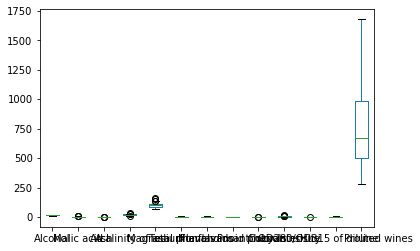

In [65]:
X.plot.box()

In [66]:
X.columns

Index(['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
       'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')

In [67]:
from sklearn.model_selection import cross_val_score, LeaveOneOut
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

X = df.drop(['target', 'Proline'], axis='columns')
y = df['target']

knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
svc = SVC()
lr = LogisticRegression(solver='liblinear')

strategy = LeaveOneOut()

all_results = []
for model in [knn, dtc, svc, lr]:
    print(model.__class__.__name__)
    results = cross_val_score(model, X, y, cv=strategy)
    all_results.append({'model':model.__class__.__name__,
                        'mean':results.mean(),
                        'std':results.std()})
    


KNeighborsClassifier
DecisionTreeClassifier
SVC
LogisticRegression


In [68]:
DataFrame(all_results)

,model,mean,std
0,KNeighborsClassifier,0.842697,0.364087
1,DecisionTreeClassifier,0.932584,0.250741
2,SVC,0.556180,0.496834
3,LogisticRegression,0.926966,0.260192


In [ ]:
#       KNeighborsClassifier 	0.696629 	0.459714
# 1 	DecisionTreeClassifier 	0.887640 	0.315808
# 2 	SVC 	0.685393 	0.464359
# 3 	LogisticRegression 	0.955056 	0.207181

In [71]:
from sklearn.model_selection import cross_val_score, LeaveOneOut
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

X = df.drop('target', axis='columns')
y = df['target']

scaler = MinMaxScaler()
scaler.fit(X)  # teach the scaler about min/max
scaled_X = scaler.transform(X)

knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
svc = SVC()
lr = LogisticRegression(solver='liblinear')

strategy = LeaveOneOut()

all_results = []
for model in [knn, dtc, svc, lr]:
    print(model.__class__.__name__)
    results = cross_val_score(model, scaled_X, y, cv=strategy)
    all_results.append({'model':model.__class__.__name__,
                        'mean':results.mean(),
                        'std':results.std()})
    


KNeighborsClassifier
DecisionTreeClassifier
SVC
LogisticRegression


In [72]:
DataFrame(all_results)

,model,mean,std
0,KNeighborsClassifier,0.949438,0.219101
1,DecisionTreeClassifier,0.876404,0.329120
2,SVC,0.988764,0.105403
3,LogisticRegression,0.977528,0.148212


In [73]:
# regression problems
#  -- supervised learning
#  -- output will be a floating-point number 

# Boston housing dataset


In [74]:
from sklearn.datasets import load_boston
boston = load_boston()

In [75]:
dir(boston)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [76]:
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [77]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [78]:
# create an X and y
X = DataFrame(boston.data, columns=boston.feature_names)
y = Series(boston.target)

In [79]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [80]:
# choose an estimator + create a new model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [81]:
# train the model
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [82]:
# predict with the model
y_pred = model.predict(X)

In [84]:
(y_pred == y).value_counts()

False    506
dtype: int64

In [85]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred, y)

21.894831181729202

In [89]:
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# create an X and y
X = DataFrame(boston.data, columns=boston.feature_names)
y = Series(boston.target)

X_train, X_test, y_train, y_test = train_test_split(X, y)

# choose an estimator + create a new model
model = LinearRegression()

# train the model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mean_squared_error(y_pred, y_test)

23.52842291166747

In [95]:
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# create an X and y
X = DataFrame(boston.data, columns=boston.feature_names)
y = Series(boston.target)

# choose an estimator + create a new model
model = LinearRegression()

results = cross_val_score(model, X, y, cv=5,
                          scoring='neg_mean_squared_error')
Series(results).describe()

count     5.000000
mean    -37.131807
std      25.817580
min     -80.762371
25%     -33.313607
50%     -33.074138
75%     -26.048621
max     -12.460301
dtype: float64

In [94]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']